# Practica 0

### Check python version

In [1]:
from platform import python_version
print(python_version())

3.6.9


## Imports 

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Funciones auxiliares

Hacemos una función que nos permite pasar de codificación BGR a RGB.

In [3]:
def BGRtoRGB(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

Hacemos una función que nos indica si una imagen está en blanco y negro. Por lo general ```shape``` nos devuelve el número de filas, columnas y canales, pero si la imagen esta en blanco y negro solo devuelve filas y columnas. [Info](https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html)

In [4]:
def isBW(im):
    return len(im.shape) == 2

## Ejercicio 1

In [5]:
def leeimagen(filename, flagColor):
    image = cv2.imread(filename, flagColor)

    plt.axis("off")
    if isBW(image):
        plt.imshow(image, cmap = "gray")
    else:
        plt.imshow(BGRtoRGB(image))
    plt.show()
    
    return image

La etiqueta ```flagColor``` sirve para seleccionar si la visualización sera en blanco y negro (```0```) o en color(```1```)

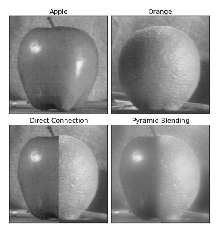

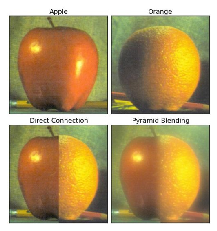

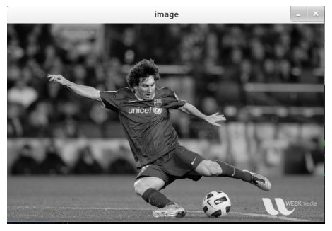

In [6]:
imagenBN = leeimagen("images/orapple.jpg", 0)
imagenColor = leeimagen("images/orapple.jpg", 1)
imagenMessi = leeimagen("images/messi.jpg",1)

## Ejercicio 2

Declaramos la funcion ```pintaI```, que acepta una matriz o imagen y la pinta. En caso de pasar una imagen será necesario hacer el cambio BGR a RGB previamente.

In [7]:
def pintaI(im, titulo="Imagen"):
    plt.axis("off")
    plt.title(titulo)
    if isBW(im):
        plt.imshow(im, cmap="gray")
    else:
        plt.imshow(im)
    plt.show()

Generemos una matriz ```100x100``` de tripletas y otra de flotantes. Vemos como se muestran en color y en BN respectivamente.

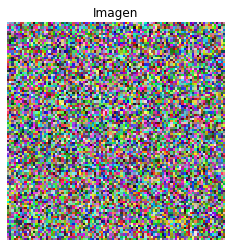

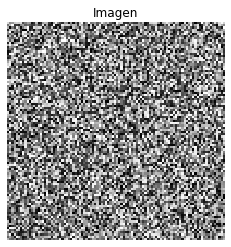

In [8]:
pintaI(np.random.rand(100,100,3))
pintaI(np.random.rand(100,100))

Leemos ahora una de las imagenes que tenemos y hacemos la transformación para obtener los colores correctamente.

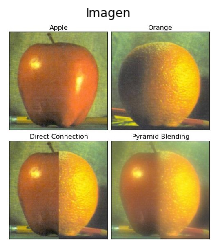

In [9]:
img = cv2.imread("images/orapple.jpg", 1)
img = BGRtoRGB(img)
pintaI(img)

## Ejercicio 3

Para pintar varias imagenes al mismo tiempo, recorremos las imagenes y llamamos al ```PintaI```. Como en ```PintaI``` ya tenemos en cuenta los diferentes tipos de imagenes, aquí no tenemos que hacer nada.

Para poder visualizar las imagenes juntas utilizamos ```hconcat```, es necesario que todas las imagenes (tratadas como matrices) tengan la misma dimensión y profundidad. [Info](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaf9771c991763233866bf76b5b5d1776f) 

Para ello transformamos todas las imagenes a imagenes a color (1), guardamos la altura máxima de todas las fotos y adecuamos la altura de cada una de ellas a esta creando un borde negro (2).
Para hacer esto último utilizamos ```copyMakeBorder```. [Info](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36)

In [10]:
def pintaMI(vim, titulo='Imagenes', border=(255,255,255)):

    altura = max(im.shape[0] for im in vim)

    for i,im in enumerate(vim):
        if isBW(im): # (1)
            vim[i] = cv2.cvtColor(vim[i], cv2.COLOR_GRAY2BGR)

        if im.shape[0] < altura: # (2)
            vim[i] = cv2.copyMakeBorder(
                vim[i], 0, altura - vim[i].shape[0],
                0, 0, cv2.BORDER_CONSTANT, value = border
            )
    
    im = cv2.hconcat(vim)
    pintaI(im, titulo)

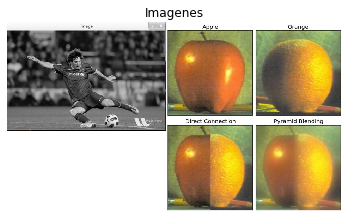

In [11]:
pintaMI([imagenMessi, BGRtoRGB(imagenColor)])

## Ejercicio 4

Declaramos la función ```modPixeles``` que acepta dos parámetros:
+ ```im```: La imagen a editar.
+ ```pixels```: La lista de pixeles a editar.
En el caso de una imagen a color, la función la "amarillea" y en el caso de una imagen en blanco y negro, produce un oscurecimiento.

In [12]:
def modPixeles(im, pixels):
    color = (10,0,0)

    if isBW(im):
        color = 10

    for pixel in pixels:
        if isBW(im):
            im[pixel] = im[pixel]/2
        else:
            im[pixel][0] = 0

Probemos ahora como se muestran las imagenes a color.

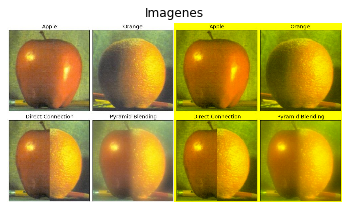

In [13]:
color = [BGRtoRGB(imagenColor)]
color2 = imagenColor.copy()
altura, anchura, *rest = color2.shape
modPixeles(color2,
             [(x,y) for x in range(altura) for y in range(anchura)])

pintaMI(color + [BGRtoRGB(color2)])

Y ahora en blanco y negro.

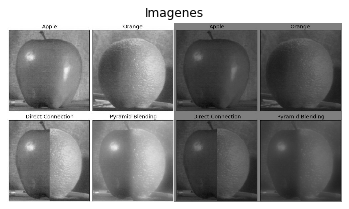

In [14]:
bn = [imagenBN]
bn2 = imagenBN.copy()
altura, anchura, *rest = bn2.shape
modPixeles(bn2,
             [(x,y) for x in range(altura) for y in range(anchura)])

pintaMI(bn + [bn2])

## Ejercicio 5

Luego declaramos la función encargada de recibir el vector de imagenes(```vim```) y el de títulos(```titulos```). Luego llama a ```pintaMI``` con los parámetros adecuados.

In [15]:
def representaIm(vim, titulos):
    pintaMI(vim, titulo = " | ".join(titulos))

Ahora probamos la función con unas imagenes.

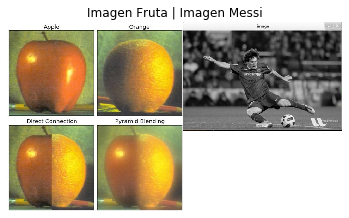

In [16]:
representaIm([BGRtoRGB(imagenColor)] + [imagenMessi], ["Imagen Fruta"] + ["Imagen Messi"])